In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


##Strategic Store Expansion Using Household Debt Insights

In this project, we aim to uncover insights into the relationship between household debt to income ratio and the strategic decisions of store openings by Target.  While we don't have access to the performance data of existing stores, we can use economic information to identify regions with high potential for new store success. By analyzing household debt characteristics, we can recommend prime locations for Target's expansion.

Our key question is: How can household debt, specifically the household debt-to-income ratio, inform Target's strategic decisions when opening new stores?

We will be using two datasets for this project:

1.   targets.csv - This dataset includes a record for Target locations currently in operation as of April 2017
2.   debt_county.csv - This dataset includes a record of the household debt to income ration since 1999

Let's begin the cleaning process for target.csv

## Data Inspection

In [ ]:
raw_target_data = pd.read_csv('target.csv', encoding='latin1')
raw_target_data.head()

,X.locale,Address.AddressLine1,Address.AddressLine2,Address.City,Address.CountryName,Address.County,Address.FormattedAddress,Address.IntersectionDescription,Address.Latitude,Address.Longitude,...,Is24Hours.Sat,IsOpen.Sat,Summary.Sat,ThruTime.Sat,BeginTime.Sun,Is24Hours.Sun,IsOpen.Sun,Summary.Sun,ThruTime.Sun,AllCapability
0,en-US,400 Oxford Exchange Blvd,NaN,Oxford,United States,Calhoun,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",SEC I-20 & Golden Creek Rd,33.608825,-85.783182,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Star..."
1,en-US,2640 Enterprise Dr,NaN,Opelika,United States,Lee,"2640 Enterprise Dr, Opelika, AL 36801-1511",NWC I-85 & Hwy 280,32.618108,-85.410636,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'..."
2,en-US,1129 S Park St,NaN,Carrollton,United States,Carroll,"1129 S Park St, Carrollton, GA 30117-4429",NWC US 27 & Hwy 166 Bypass,33.558920,-85.076473,...,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-9:00 p.m.,21:00:00,NaN
3,en-US,555 Bullsboro Dr,NaN,Newnan,United States,Coweta,"555 Bullsboro Dr, Newnan, GA 30265-1045",SWC I-85 & Rte 34,33.392907,-84.758875,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Fresh Grocery', 'Mob..."
4,en-US,1591 Bradley Park Dr,NaN,Columbus,United States,Muscogee,"1591 Bradley Park Dr, Columbus, GA 31904-3071",NEC Bradley Pk & JR Allen Pkwy,32.534649,-84.971073,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Phot..."


Here we can see the first 5 rows in our dataset and understand the formats of each column. In this dataset, there are 47 features that we need to examine to determine their relevance to our analysis.

In [ ]:
raw_target_data.shape

(1829, 47)

Here we see that there are 1829 rows/stores. Let's check for duplicate values to ensure every row is unique.

In [ ]:
raw_target_data.duplicated().sum()

0

We see that there are no duplicated, but to be sure let's ensure there are the same number of unique values as there are rows. This ensures there are no duplicate stores even if the row is not completely the same


In [ ]:
raw_target_data.duplicated(subset=['Address.AddressLine1']).sum()

0

Here we see again that there are no duplicates in terms of addresses.

Let's now assess which columns are impactful to our analysis of answering our key question: How can household debt data, specifically the household debt-to-income ratio, inform Target's strategic decisions when opening new stores?

First let's take a look at all of the columns.

In [ ]:
raw_target_data.columns

Index(['X.locale', 'Address.AddressLine1', 'Address.AddressLine2',
       'Address.City', 'Address.CountryName', 'Address.County',
       'Address.FormattedAddress', 'Address.IntersectionDescription',
       'Address.Latitude', 'Address.Longitude', 'Address.PostalCode',
       'Address.Subdivision', 'AlternateIdentifier.ID', 'ID',
       'IsDaylightSavingsTimeRecognized', 'LocationMilestones.LastRemodelDate',
       'LocationMilestones.OpenDate', 'Market', 'Name',
       'OperatingHours..timeFormat', 'Store.StoreDistrictID',
       'Store.StoreGroupID', 'Store.StoreRegionID', 'SubTypeDescription',
       'TimeZone.TimeZoneCode', 'TimeZone.TimeZoneDescription',
       'TimeZone.TimeZoneOffset.OffsetCode',
       'TimeZone.TimeZoneOffset.OffsetHours', 'TypeCode', 'PhoneNumber',
       'FaxNumber', 'BeginTime.MF', 'Is24Hours.MF', 'IsOpen.MF', 'Summary.MF',
       'ThruTime.MF', 'BeginTime.Sat', 'Is24Hours.Sat', 'IsOpen.Sat',
       'Summary.Sat', 'ThruTime.Sat', 'BeginTime.Sun', 'Is24Hour

We see here many fields having to do with store open times. I will keep these variables in mind however at this time they are not relevant to our analysis so they will be dropped. I will explore remaining data later on in the notebook.

Irrelevant time fields will now be dropped.

In [ ]:
# List of columns to drop
columns_to_drop = [
    'BeginTime.MF', 'Is24Hours.MF', 'IsOpen.MF', 'Summary.MF',
    'ThruTime.MF', 'BeginTime.Sat', 'Is24Hours.Sat', 'IsOpen.Sat',
    'Summary.Sat', 'ThruTime.Sat', 'BeginTime.Sun', 'Is24Hours.Sun',
    'IsOpen.Sun', 'Summary.Sun', 'ThruTime.Sun',
    'TimeZone.TimeZoneCode', 'TimeZone.TimeZoneDescription',
    'TimeZone.TimeZoneOffset.OffsetCode', 'OperatingHours..timeFormat',
    'TimeZone.TimeZoneOffset.OffsetHours'
]

# Drop the columns
raw_target_data_drop = raw_target_data.drop(columns=columns_to_drop)

#check for relevant columns
raw_target_data_drop.columns

Index(['X.locale', 'Address.AddressLine1', 'Address.AddressLine2',
       'Address.City', 'Address.CountryName', 'Address.County',
       'Address.FormattedAddress', 'Address.IntersectionDescription',
       'Address.Latitude', 'Address.Longitude', 'Address.PostalCode',
       'Address.Subdivision', 'AlternateIdentifier.ID', 'ID',
       'IsDaylightSavingsTimeRecognized', 'LocationMilestones.LastRemodelDate',
       'LocationMilestones.OpenDate', 'Market', 'Name',
       'Store.StoreDistrictID', 'Store.StoreGroupID', 'Store.StoreRegionID',
       'SubTypeDescription', 'TypeCode', 'PhoneNumber', 'FaxNumber',
       'AllCapability'],
      dtype='object')

Now that we've removed all irrelevant store operating hours columns we can begin to explore if the remaining columns are relevant and how relevant they are to our analysis. Off the bat features such as phone number, fax number, 'is day light savings recognized" are irrelevant so we will drop those.

In [ ]:
# List of columns to drop
columns_to_drop2 = ['PhoneNumber', 'FaxNumber', 'IsDaylightSavingsTimeRecognized',
                    'Address.IntersectionDescription','Address.CountryName',
                    'Address.FormattedAddress','AlternateIdentifier.ID','ID']

# Drop the columns
raw_target_data_drop.drop(columns=columns_to_drop2, inplace=True)

In [ ]:


#Check Columns
raw_target_data_drop.columns


Index(['X.locale', 'Address.AddressLine1', 'Address.AddressLine2',
       'Address.City', 'Address.County', 'Address.Latitude',
       'Address.Longitude', 'Address.PostalCode', 'Address.Subdivision',
       'LocationMilestones.LastRemodelDate', 'LocationMilestones.OpenDate',
       'Market', 'Name', 'Store.StoreDistrictID', 'Store.StoreGroupID',
       'Store.StoreRegionID', 'SubTypeDescription', 'TypeCode',
       'AllCapability'],
      dtype='object')

Now we have 24 columns left. We will now explore each column to understand if it's relevant to our analysis and how relevant it is to answering our question: How can household debt data, specifically the household debt-to-income ratio, inform Target's strategic decisions when opening new stores?

## Column Cleaning

Let's analyze the number of null values in our datset

In [ ]:
raw_target_data_drop.isnull().sum()

X.locale                                 0
Address.AddressLine1                     0
Address.AddressLine2                  1771
Address.City                             0
Address.County                           1
Address.Latitude                         0
Address.Longitude                        0
Address.PostalCode                       0
Address.Subdivision                      0
LocationMilestones.LastRemodelDate     395
LocationMilestones.OpenDate              0
Market                                  91
Name                                     0
Store.StoreDistrictID                    0
Store.StoreGroupID                       0
Store.StoreRegionID                      0
SubTypeDescription                    1522
TypeCode                                 0
AllCapability                           12
dtype: int64

In [ ]:
raw_target_data['Name']

0                 Oxford
1                Opelika
2             Carrollton
3                 Newnan
4               Columbus
              ...       
1824           Stone Oak
1825       New Braunfels
1826          San Marcos
1827                Kyle
1828    Austin Southpark
Name: Name, Length: 1829, dtype: object

We've identified null values in several columns, including 'Address.AddressLine2' (1771 nulls), 'SubTypeDescription' (1522 nulls), 'LocationMilestones.LastRemodelDate' (395 nulls), 'Capabilities' (12 nulls), and 'Market' (91 nulls). These nulls may reflect non-remodeled locations or a lack of additional capabilities. Further analysis is needed to determine the most appropriate handling of these null values.

Let's start with Address Line 2

In [ ]:
#explore address.line2
raw_target_data_drop['Address.AddressLine2'].unique()

array([nan, 'Ste 4000', 'Ste B', 'Ste 400', 'Ste 7', 'Ste 300', 'Ste 600',
       'Ste A', 'Ste 80', 'Ste 200', 'Ste 100', 'Ste 90', 'Ste F',
       'Ste 2400', 'Ste H', 'Ste 120', 'Ste 1', 'Ste 700', 'Ste 2250',
       'Ste Target', '#50', 'Ste F600', 'Suite 201', 'Ste 140', 'Ste 5',
       'Ste 121', 'Ste 110', 'Ste 1S', 'Ste 1900', 'Ste 49', 'STE 1',
       'Ste 201', 'Ste 500', 'Ste 101', 'Ste 102', 'Ste 2', 'Ste 42',
       'Bldg A100', 'Ste 1A', 'PO Box 5124', 'Ste. 100', 'Ste 125',
       'Ste G'], dtype=object)

Here we see the Adress Line 2 data. It's mostly unit numbers which are not very relevant to our analysis since we have the main address in another field. We can drop this column from the data.

In [ ]:
#drop AddressLine2
raw_target_data_drop1 = raw_target_data_drop.drop('Address.AddressLine2', axis=1)

#check drop
raw_target_data_drop1.columns

Index(['X.locale', 'Address.AddressLine1', 'Address.City', 'Address.County',
       'Address.Latitude', 'Address.Longitude', 'Address.PostalCode',
       'Address.Subdivision', 'LocationMilestones.LastRemodelDate',
       'LocationMilestones.OpenDate', 'Market', 'Name',
       'Store.StoreDistrictID', 'Store.StoreGroupID', 'Store.StoreRegionID',
       'SubTypeDescription', 'TypeCode', 'AllCapability'],
      dtype='object')

Now we can explore the subtype description field

In [ ]:
#explore subtype description

raw_target_data_drop1['SubTypeDescription'].unique()

array([nan, 'SuperTarget', 'TargetExpress', 'City'], dtype=object)

This columns' information might actually be interesting to analyze, it describes the type of Target that has been opened - 'SuperTarget', 'TargetExpress', or'City'. I can deal with the Nan values by webscraping or can assume that they are regular targets. For now I will assume that they are regular targets and map all nan values to 'Regular'

In [ ]:
#replace all null values with 'Regular'
raw_target_data_drop1['SubTypeDescription'].fillna('Regular',inplace = True)


In [ ]:
#check for no null values
raw_target_data_drop1['SubTypeDescription'].isnull().sum()

0

In [ ]:
#check for unique values
raw_target_data_drop1['SubTypeDescription'].unique()

array(['Regular', 'SuperTarget', 'TargetExpress', 'City'], dtype=object)

We now see that there are no nulls in the SubTypeDescription column and all NaN have been replaced with 'Regular'

Now it's time to explore the X.locale column

In [ ]:
#explore X.Locale
raw_target_data_drop1['X.locale'].unique()

array(['en-US'], dtype=object)

This column only contains 'en-US' meaning all locations are the same we can drop this column as it is redundant.

In [ ]:
#drop x.locale
raw_target_data_drop2 = raw_target_data_drop1.drop('X.locale', axis=1)

#check drop
raw_target_data_drop2.columns

Index(['Address.AddressLine1', 'Address.City', 'Address.County',
       'Address.Latitude', 'Address.Longitude', 'Address.PostalCode',
       'Address.Subdivision', 'LocationMilestones.LastRemodelDate',
       'LocationMilestones.OpenDate', 'Market', 'Name',
       'Store.StoreDistrictID', 'Store.StoreGroupID', 'Store.StoreRegionID',
       'SubTypeDescription', 'TypeCode', 'AllCapability'],
      dtype='object')

Now let's clean the LastRemodeled field. This field is important for analysis because I'd like to see if remodeling occurred because it can be a sign of Target re-investing which could indicate a successful store since we don't have sales/performance data.

In [ ]:
#explore last remodeled field
raw_target_data_drop2['LocationMilestones.LastRemodelDate'].isna().sum()

395

We see that there are 395 nulls to handle. Because this field's nulls could mean that the Target wasnt remodeled we will create a new field with a binary indicator. Set it to 1 if 'LocationMilestones.LastRemodelDate' is not null and 0 otherwise.

In [ ]:

# Create a binary indicator column
raw_target_data_drop2['Remodeled'] = pd.notna(raw_target_data['LocationMilestones.LastRemodelDate']).astype(int)

#check new column
raw_target_data_drop2[['LocationMilestones.LastRemodelDate','Remodeled']]


,LocationMilestones.LastRemodelDate,Remodeled
0,NaN,0
1,NaN,0
2,NaN,0
3,2013-06-27T12:00:00,1
4,2004-10-17T12:00:00,1
...,...,...
1824,NaN,0
1825,2013-06-27T12:00:00,1
1826,2009-03-04T12:00:00,1
1827,NaN,0


We can now see the Remodeled column ther 0's where there are NaNs and 1's where there are dates.



Let's convert the open date and last remodeled date column to pandas datetime in order to be able to use it for analysis later.

In [ ]:
# Convert the columns to datetime format
raw_target_data_drop2['LocationMilestones.OpenDate'] = pd.to_datetime(raw_target_data_drop2['LocationMilestones.OpenDate'])
raw_target_data_drop2['LocationMilestones.LastRemodelDate'] = pd.to_datetime(raw_target_data_drop2['LocationMilestones.LastRemodelDate'])


In [ ]:
raw_target_data_drop2[['LocationMilestones.OpenDate','LocationMilestones.LastRemodelDate']]

,LocationMilestones.OpenDate,LocationMilestones.LastRemodelDate
0,2006-07-19 12:00:00,NaT
1,2005-07-20 12:00:00,NaT
2,1997-07-23 12:00:00,NaT
3,1999-10-06 12:00:00,2013-06-27 12:00:00
4,1999-03-03 12:00:00,2004-10-17 12:00:00
...,...,...
1824,2007-07-25 12:00:00,NaT
1825,2008-07-23 12:00:00,2013-06-27 12:00:00
1826,2009-03-04 12:00:00,2009-03-04 12:00:00
1827,2009-10-07 12:00:00,NaT


Now let's explore the Market Column

In [ ]:
raw_target_data_drop2['Market'].unique()

array(['ESE', 'ESF', nan, 'SFL', 'BTC', 'RG3', 'RG4', 'RG1', 'EMW', 'RG2',
       'ENE', 'SMA', 'RBO', 'RMI', 'SMN', 'RMP', "['GTM', 'RMP']", 'GTM'],
      dtype=object)

I was unable to find any documentation on what this field means so I will drop it.

In [ ]:
#drop Market column
raw_target_data_drop3 = raw_target_data_drop2.drop('Market', axis = 1)

#check for clean data
raw_target_data_drop3.columns

Index(['Address.AddressLine1', 'Address.City', 'Address.County',
       'Address.Latitude', 'Address.Longitude', 'Address.PostalCode',
       'Address.Subdivision', 'LocationMilestones.LastRemodelDate',
       'LocationMilestones.OpenDate', 'Name', 'Store.StoreDistrictID',
       'Store.StoreGroupID', 'Store.StoreRegionID', 'SubTypeDescription',
       'TypeCode', 'AllCapability', 'Remodeled'],
      dtype='object')

Now let's explore 'All Capability'

In [ ]:
raw_target_data_drop3['AllCapability']

0       ['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Star...
1       ['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'...
2                                                     NaN
3       ['CVS pharmacy', 'Café', 'Fresh Grocery', 'Mob...
4       ['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Phot...
                              ...                        
1824    ['Bakery', 'CVS pharmacy', 'Cafe-Pizza', 'Deli...
1825    ['Accepts WIC', 'CVS pharmacy', 'Cafe-Pizza', ...
1826    ['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'...
1827    ['CVS pharmacy', 'Cafe-Pizza', 'Drive Up', 'Fr...
1828    ['Accepts WIC', 'Bakery', 'CVS pharmacy', 'Caf...
Name: AllCapability, Length: 1829, dtype: object

We see that this field contains lists of additional features that a Target has such as a CVS, Cafe, Bakery etc. This could be useful for analysis. In order to process this I will create binary indicators for each unique value. First we need to explore what all of the unique value are

In [ ]:


# Replace NaN values with an empty list
raw_target_data_drop3['AllCapability'].fillna('[]', inplace=True)

# Remove unwanted characters from the string and split the values into lists
raw_target_data_drop3['AllCapability'] = raw_target_data_drop3['AllCapability'].str.replace("[\[\]']", '', regex=True)
raw_target_data_drop3['AllCapability'] = raw_target_data_drop3['AllCapability'].str.split(', ')

# Use get_dummies to one-hot encode the capabilities
all_capabilities = pd.get_dummies(raw_target_data_drop3['AllCapability'].explode())

# Concatenate the one-hot encoded capabilities back to the original DataFrame
raw_target_data_drop3 = pd.concat([raw_target_data_drop3, all_capabilities], axis=1)

# Drop the original 'AllCapability' column
raw_target_data_drop3.drop('AllCapability', axis=1, inplace=True)


In [ ]:
raw_target_data_drop3.columns

Index(['Address.AddressLine1', 'Address.City', 'Address.County',
       'Address.Latitude', 'Address.Longitude', 'Address.PostalCode',
       'Address.Subdivision', 'LocationMilestones.LastRemodelDate',
       'LocationMilestones.OpenDate', 'Name', 'Store.StoreDistrictID',
       'Store.StoreGroupID', 'Store.StoreRegionID', 'SubTypeDescription',
       'TypeCode', 'Remodeled', '', '"DAmico & Sons Italian Kitchen"',
       '& Spirits Available', 'Accepts WIC', 'Bakery', 'Beauty Concierge',
       'Beer', 'Beer Available', 'CVS pharmacy', 'Cafe-Pizza', 'Café',
       'Chobani Cafe', 'Clinic care by Kaiser Permanente', 'Deli', 'Drive Up',
       'Fresh Grocery', 'In-Store Apple Store', 'MinuteClinic', 'Mobile Kiosk',
       'Optical', 'Photo Lab', 'Pizza Hut Salads and Snacks', 'Starbucks',
       'Sun Boutique', 'Super Target', 'Which Wich Superior Sandwiches',
       'Wine', 'Wine & Beer Available', 'Wine Available'],
      dtype='object')

We now see each Capability hot-encoded as a binary values

## Statistical Analysis

Let's explore the statistical distribution and possible correlations in this dataset. We'll start with a heat map of all numerical columns.

<ipython-input-36-664b269be1c7>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = raw_target_data_drop3[group].corr()


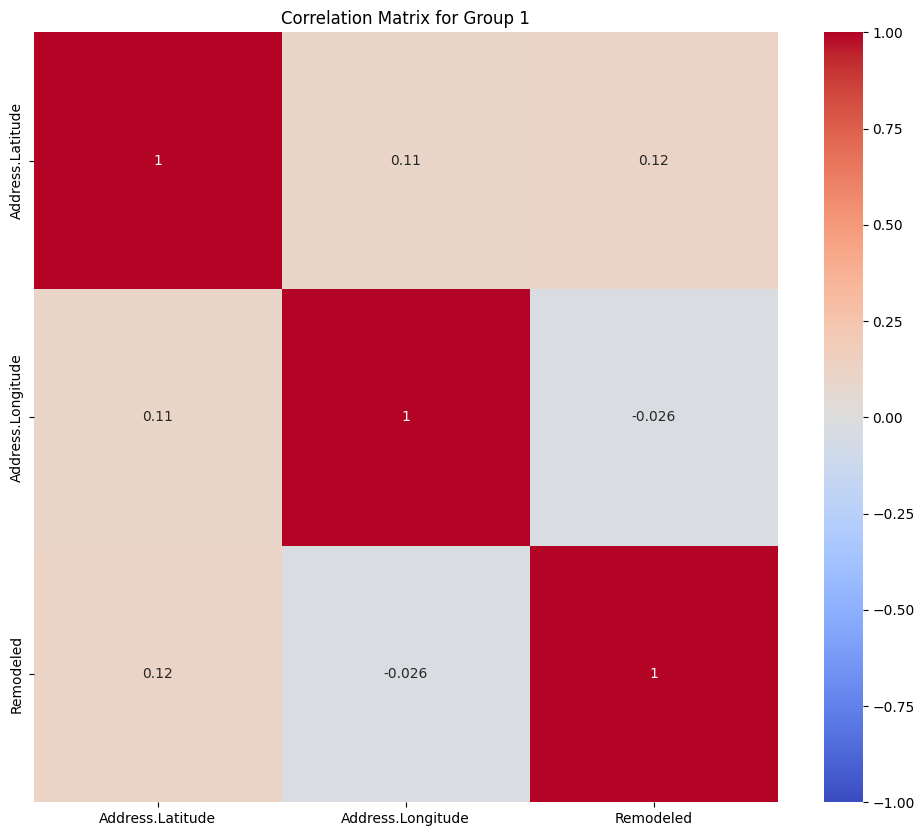

<ipython-input-36-664b269be1c7>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = raw_target_data_drop3[group].corr()


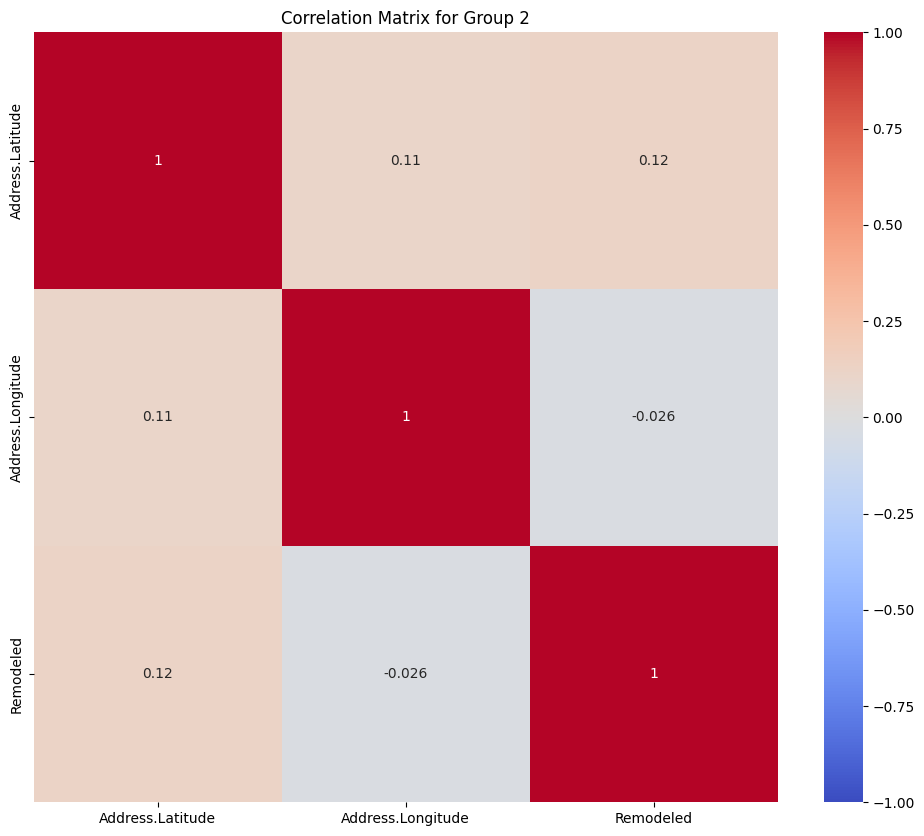

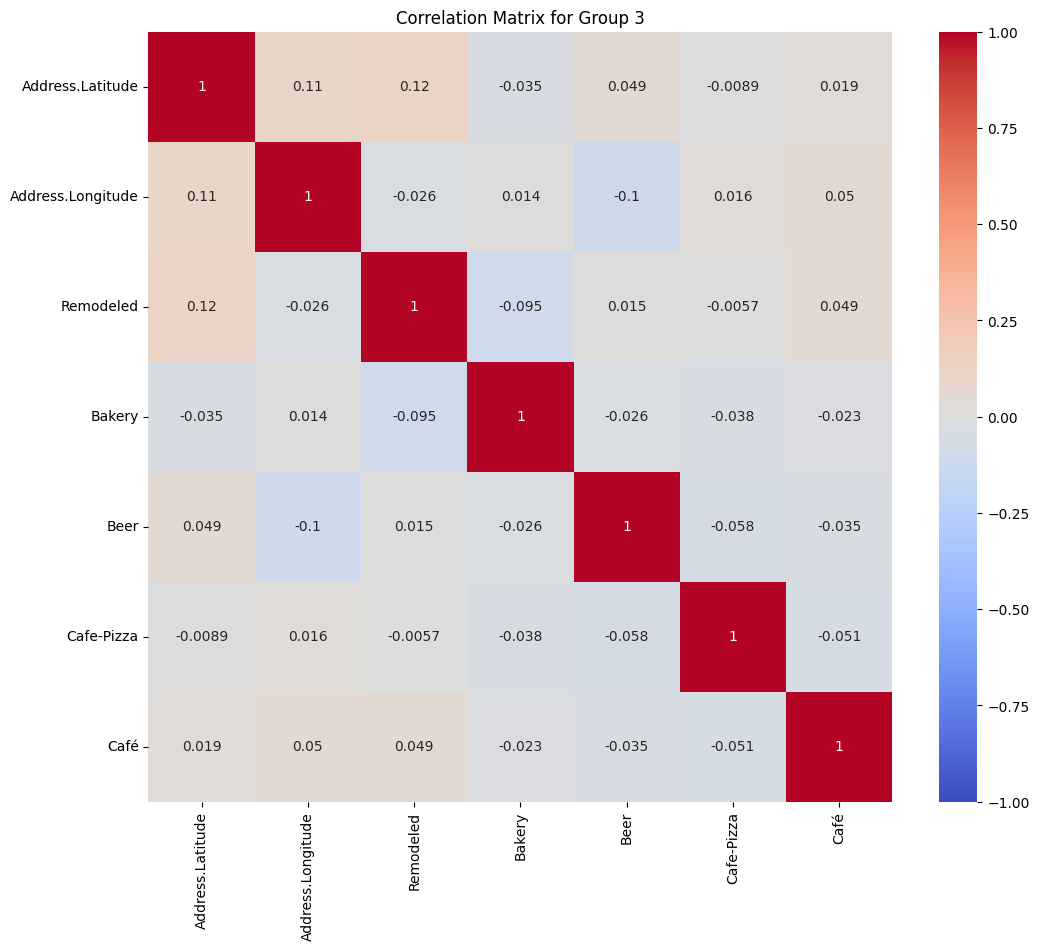

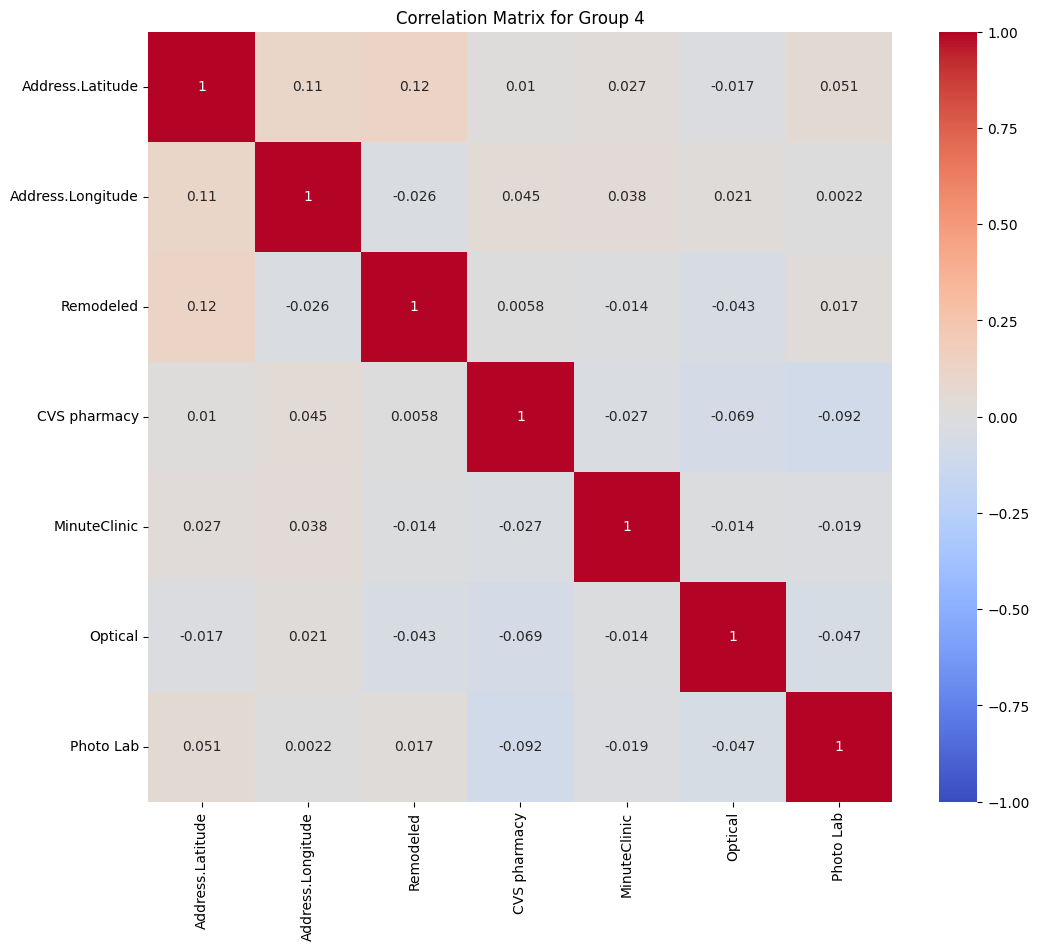

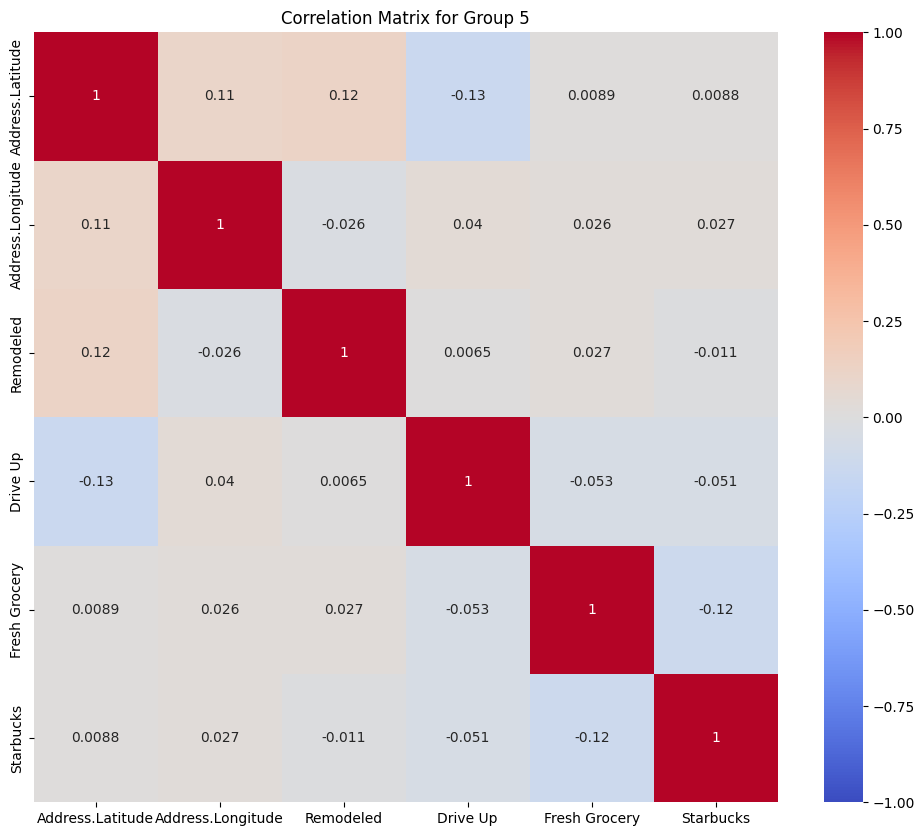

In [ ]:

# Define column groups
groups = [
    ['Address.Latitude', 'Address.Longitude', 'Remodeled', 'Address.AddressLine1', 'Address.City', 'Address.County', 'Address.PostalCode'],
    ['Address.Latitude', 'Address.Longitude', 'Remodeled', 'Name'],
    ['Address.Latitude', 'Address.Longitude', 'Remodeled', 'Bakery', 'Beer', 'Cafe-Pizza', 'Café'],
    ['Address.Latitude', 'Address.Longitude', 'Remodeled', 'CVS pharmacy', 'MinuteClinic', 'Optical', 'Photo Lab'],
    ['Address.Latitude', 'Address.Longitude', 'Remodeled', 'Drive Up', 'Fresh Grocery', 'Starbucks']
]

#Loop through each group to compute and display correlation matrix
for index, group in enumerate(groups, 1):
    correlation_matrix = raw_target_data_drop3[group].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f"Correlation Matrix for Group {index}")
    plt.show()


Upon examining the correlation matrix, we observe predominantly weak linear relationships between variables, hinting that they might largely function independently. This independence mitigates concerns about multicollinearity. However, these low correlations don't necessarily indicate an absence of relationships; non-linear interactions might be present but not reflected in the current metrics. While the initial impression suggests some variables might have lesser relevance due to their low correlation with the target, I will approach feature selection with a holistic view by exploring other types of relationships

##Histogram Analysis

Let's now plot histograms for each of the numeric columns

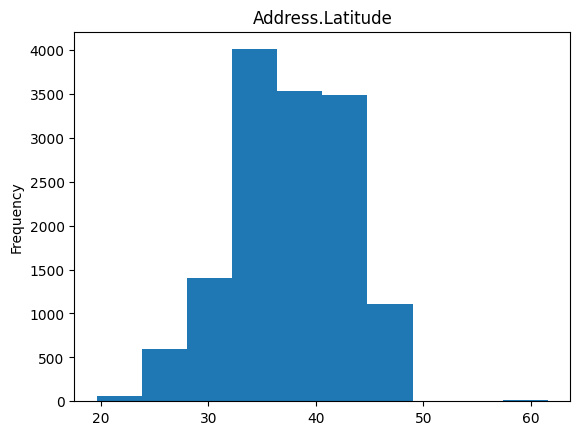

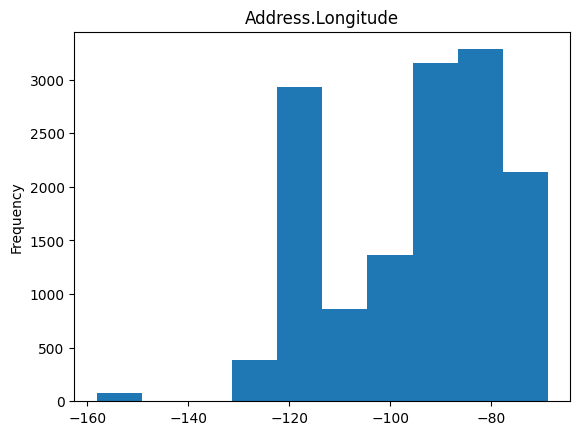

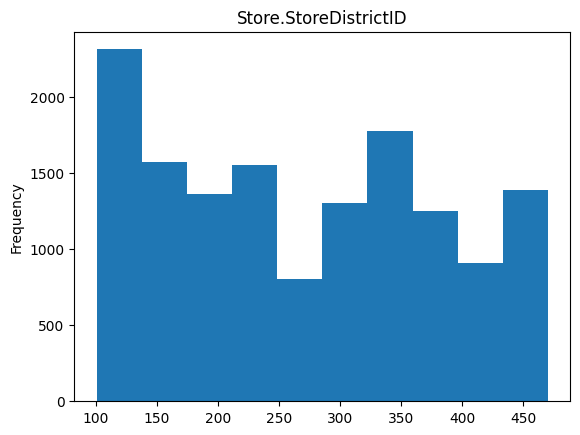

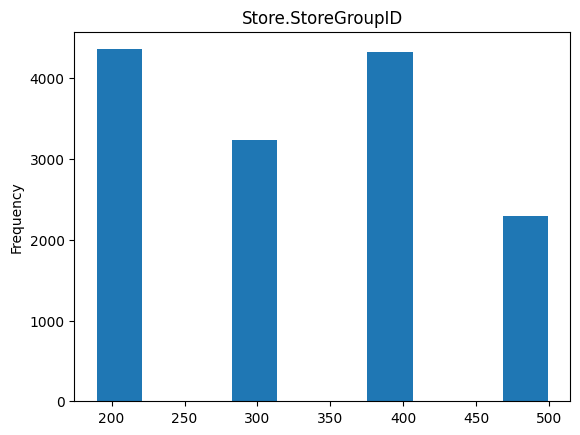

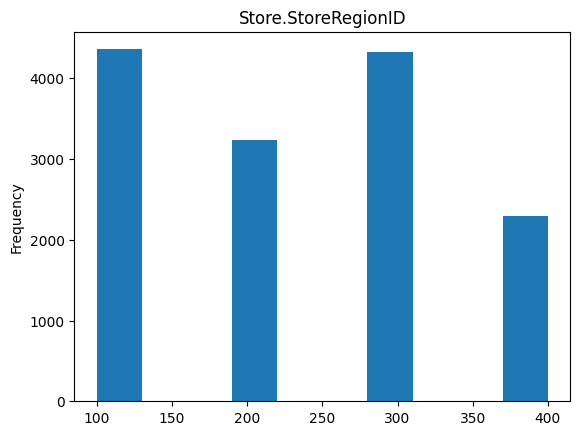

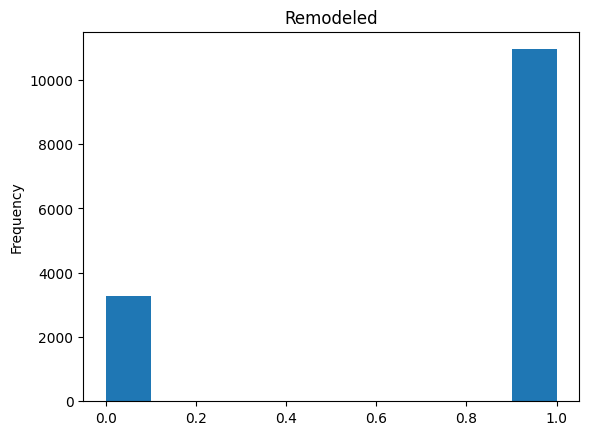

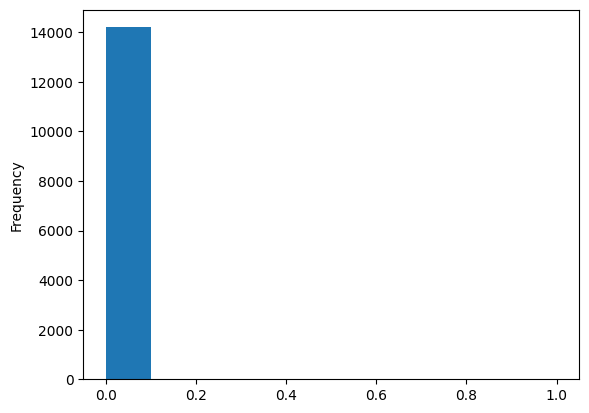

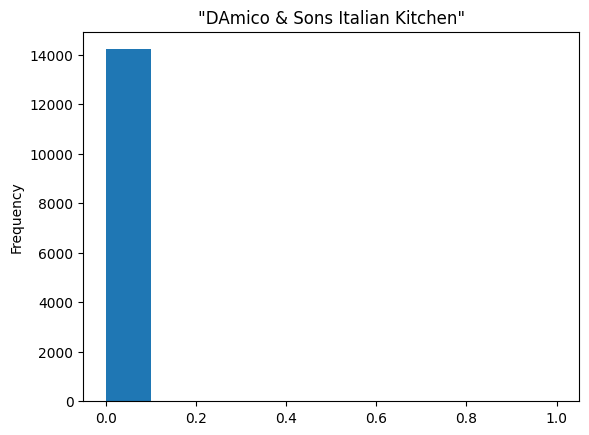

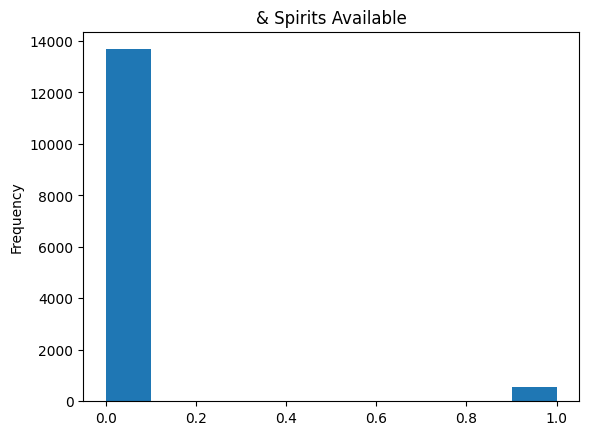

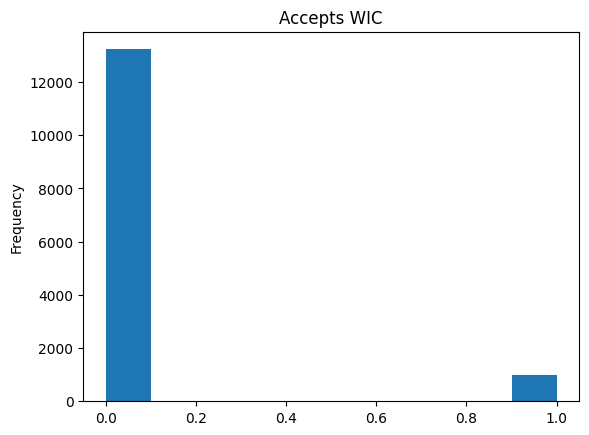

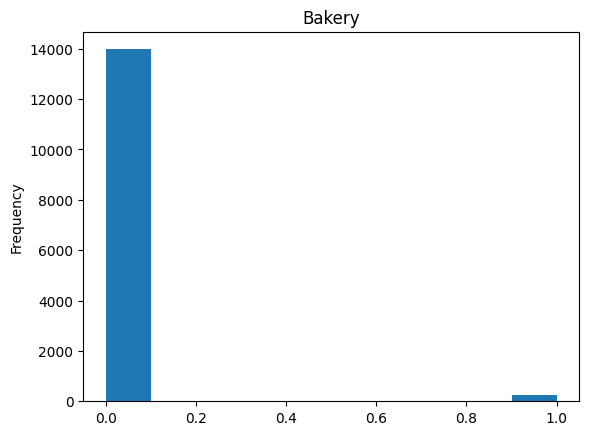

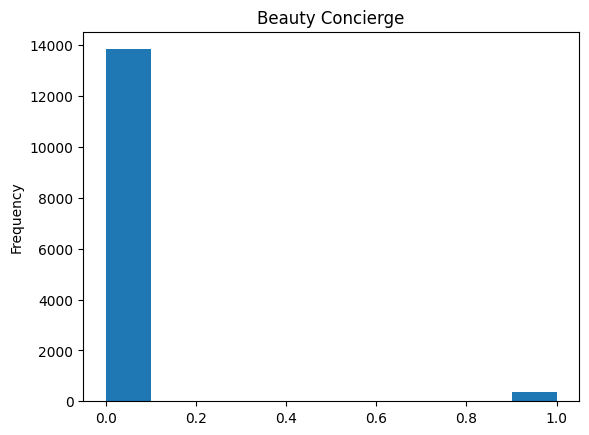

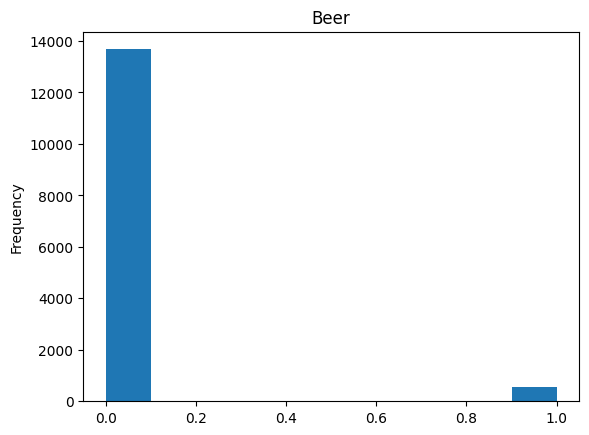

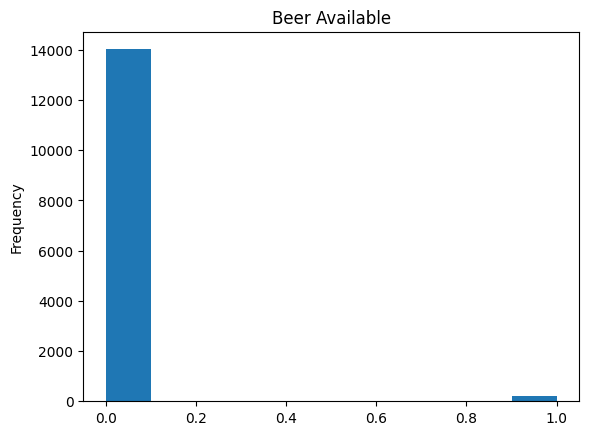

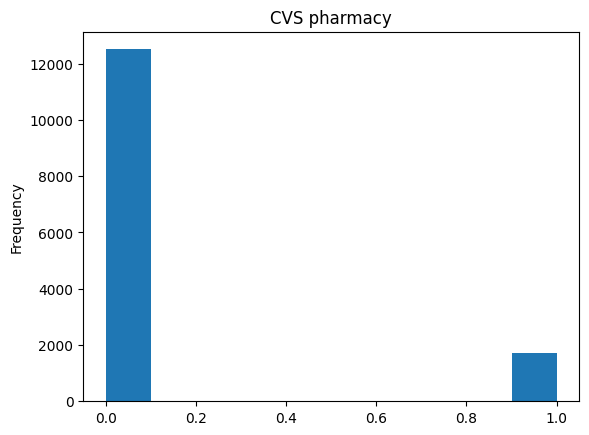

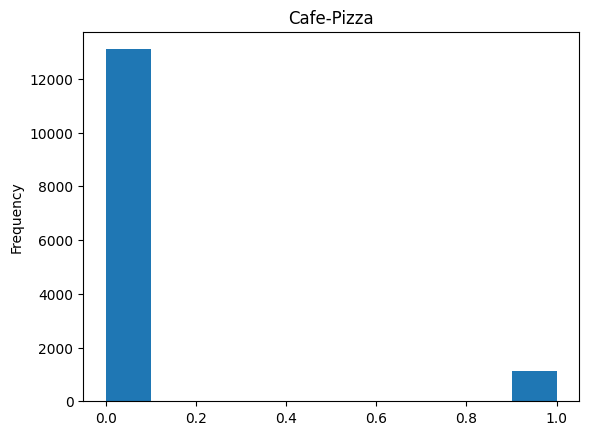

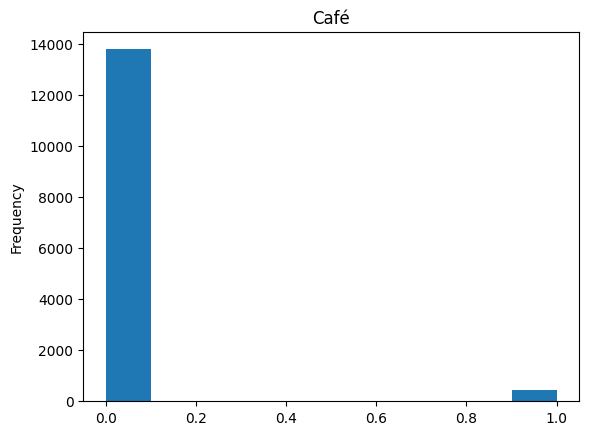

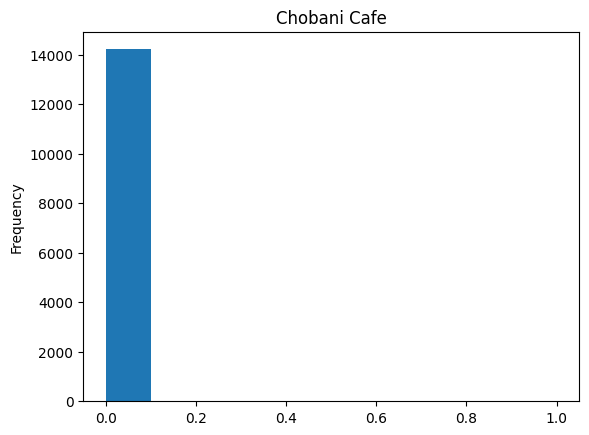

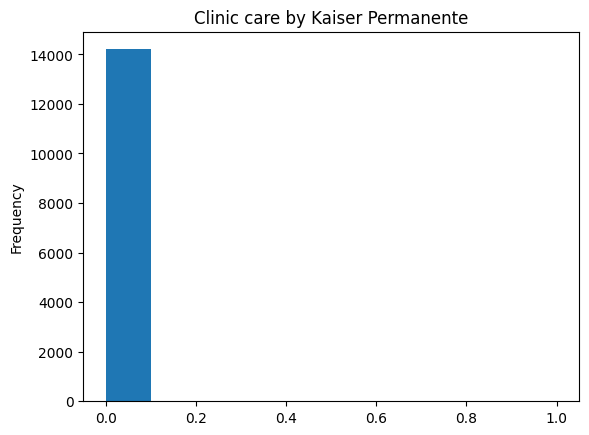

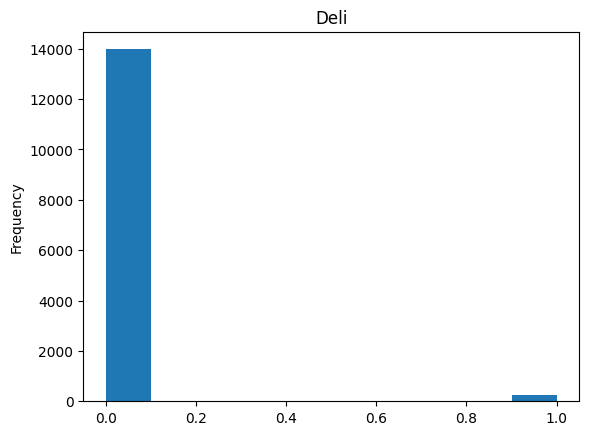

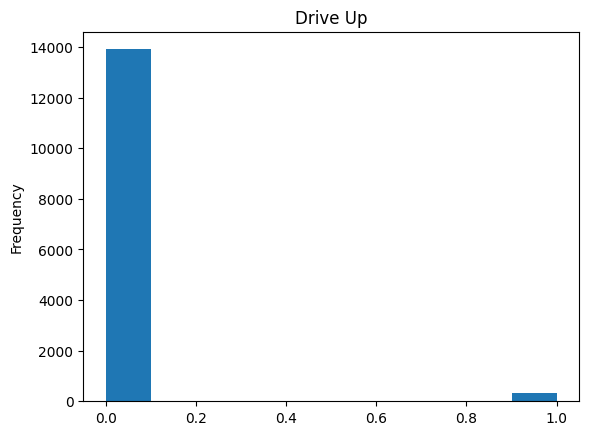

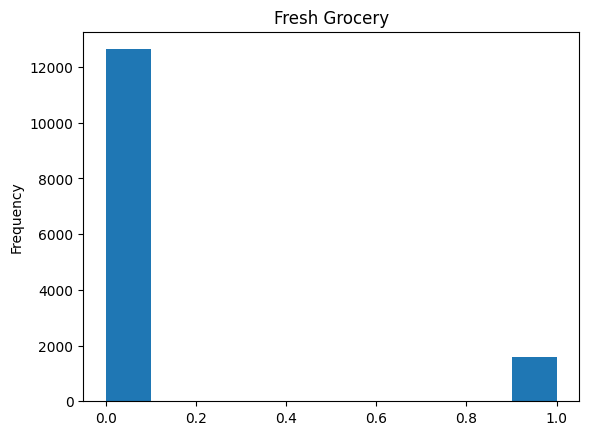

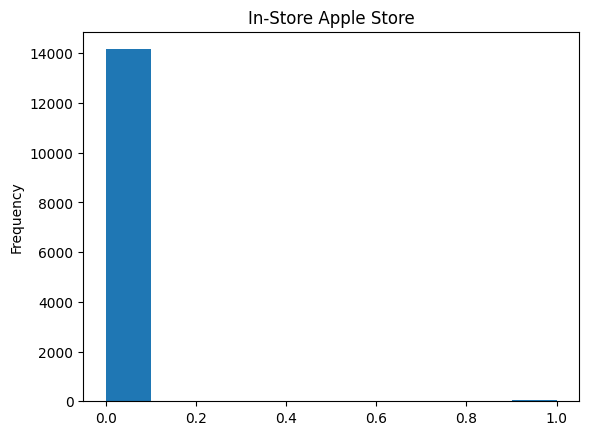

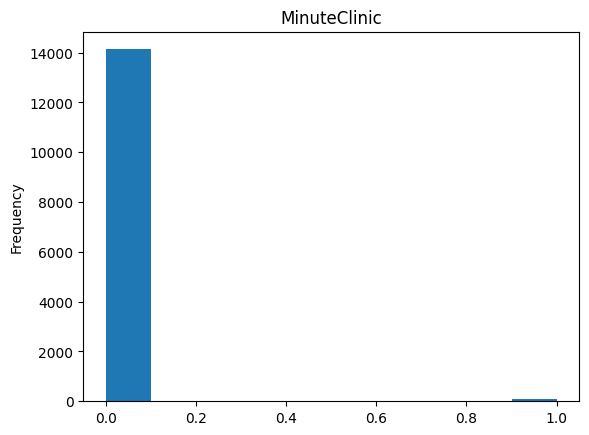

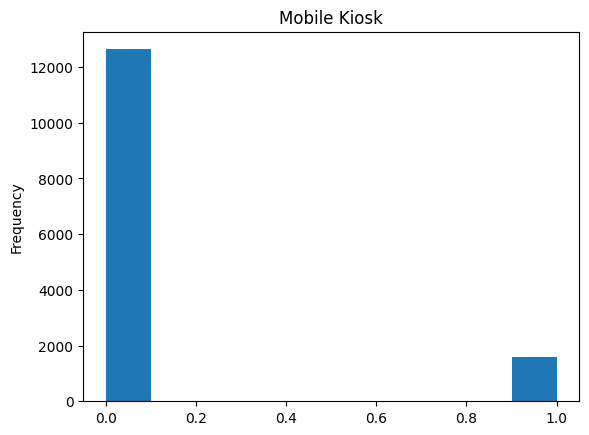

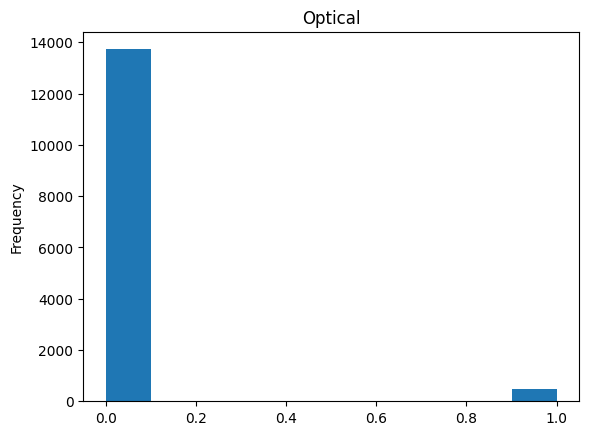

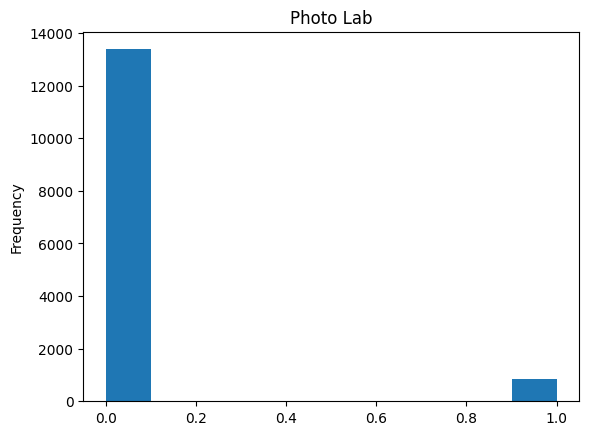

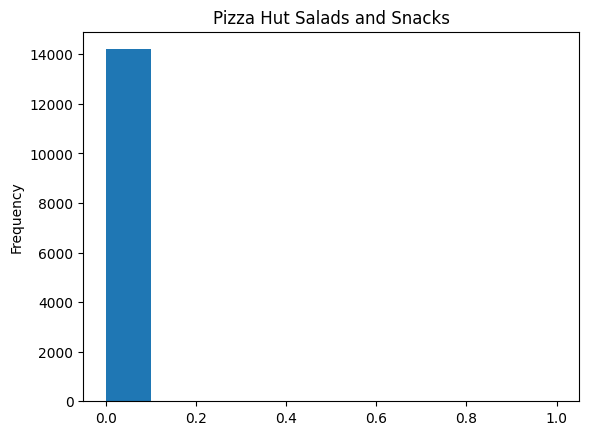

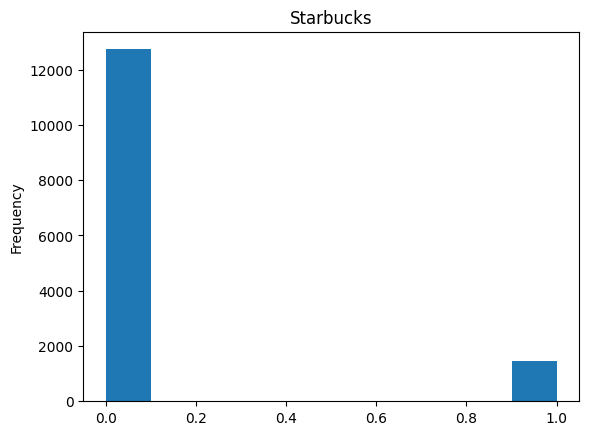

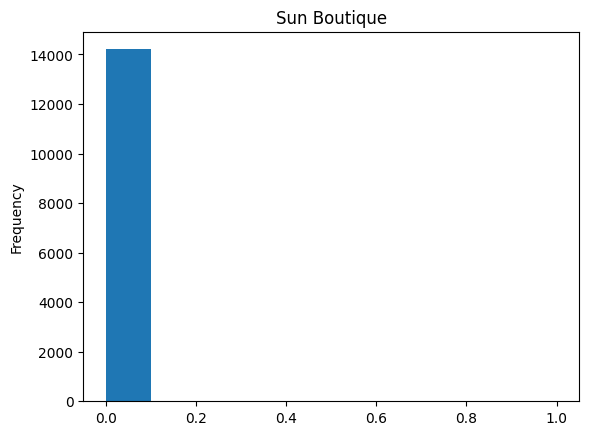

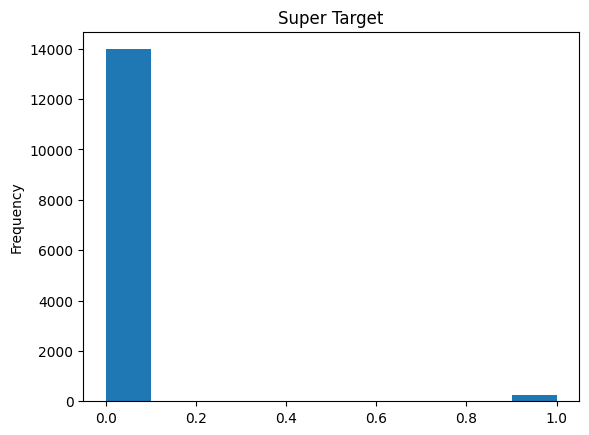

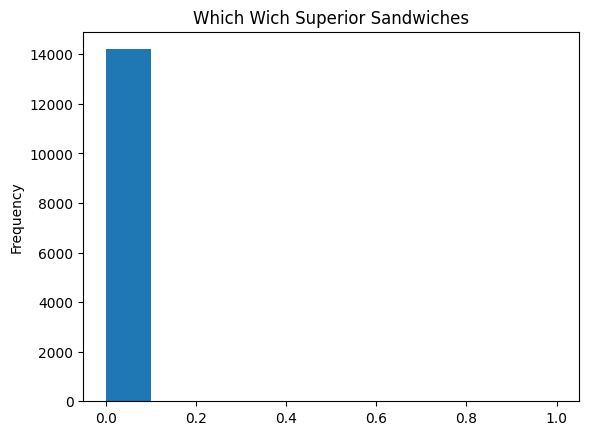

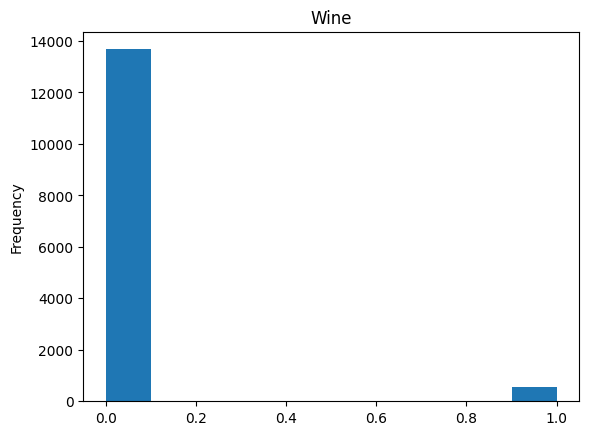

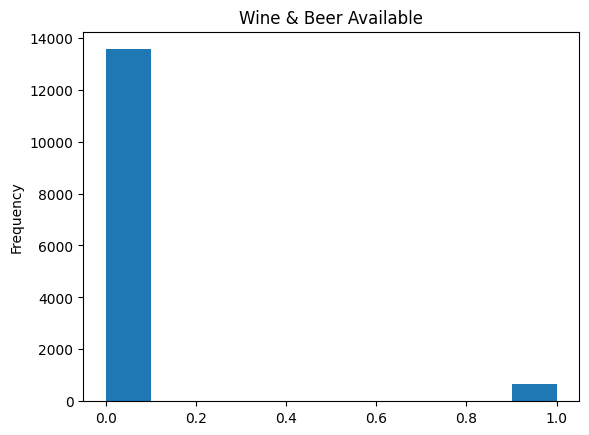

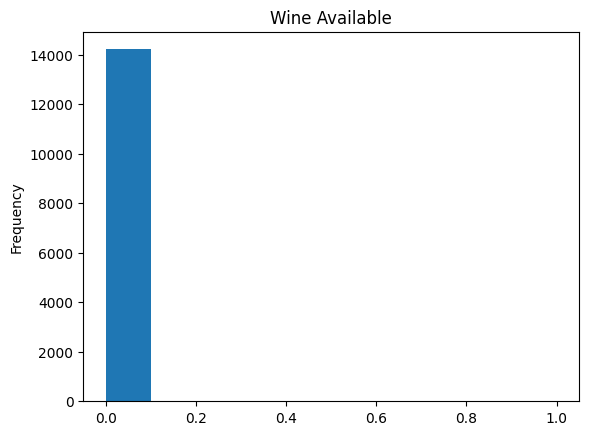

In [ ]:
numeric_raw = raw_target_data_drop3.select_dtypes(include=['number'])

for col in numeric_raw.columns:
  numeric_raw.loc[:,col].plot(kind='hist')
  plt.title(col)
  plt.show()

##Analysis of Histograms

**Latitude and Longitude:**
The distribution of the latitude and longitude values appears to be normal. This suggests a fairly even distribution of Target stores across the regions under consideration. Visualizing these coordinates on a map or plotting them in a scatter plot could provide more granular insights about store distribution relative to geographical regions.

**Remodeled Stores:**
The data indicates a higher number of stores that have undergone remodeling compared to those that haven't. This is an intriguing observation, as it suggests that Target is keen on reinvesting in existing locations. It would be valuable to explore what types of neighborhoods or areas Target is choosing to reinvest in. Factors like neighborhood income, demographic changes, or local competition could influence such decisions.

**Capabilities:**
An initial glance at the histograms reveals that a significant number of stores lack certain capabilities. Understanding this trend could be crucial for strategic decisions. The absence of these capabilities might be indicative of older store models, regional preferences, or specific business strategies. Delving deeper into this data could help identify opportunities for store upgrades, features based on regional needs, or even potential expansion with newer store models in untapped regions

##Scatter Plot Analysis

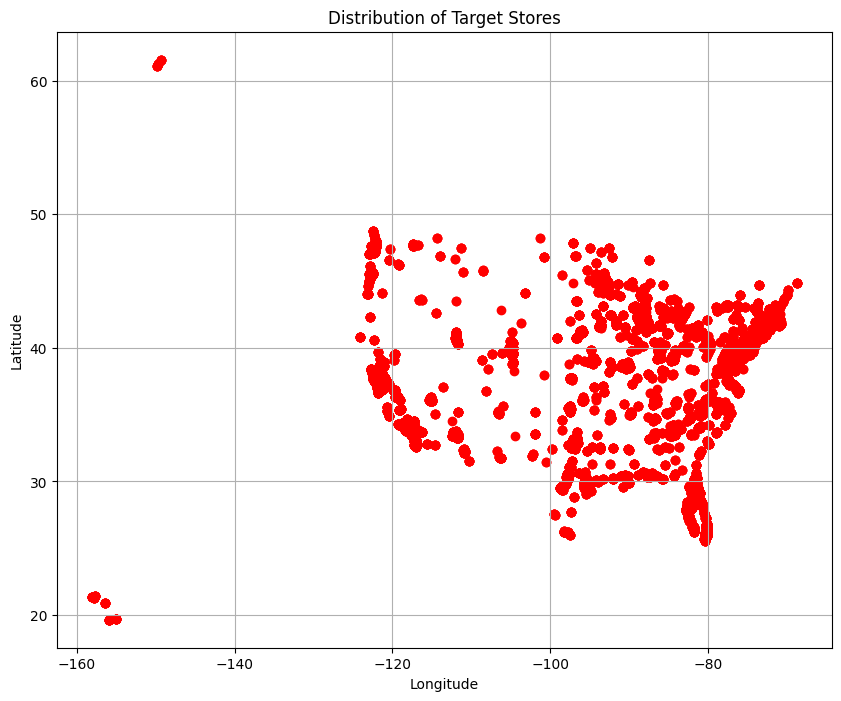

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(raw_target_data_drop3['Address.Longitude'], raw_target_data_drop3['Address.Latitude'], c='red', marker='o')
plt.title("Distribution of Target Stores")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

## Analysis of the Geographic Distribution of Target Stores:

Upon plotting the latitude and longitude coordinates of each Target store, the scatter plot  shapes out a  silhouette resembling that of the USA. This geographic distribution provides us with several valuable insights:

**Broad Presence:** The distribution indicates that Target has a wide-reaching presence across the continental United States. The scattering of stores from coast to coast suggests a national strategy in place, aiming to cater to a diverse range of demographics and regional preferences.

**Density Variations:** While the scatter plot outlines the country, variations in the density of points indicate regions where Target has a stronger retail presence. Densely populated areas or economic hubs likely have a higher concentration of stores, signaling the company's strategic placement in locations with potentially higher foot traffic and purchasing power.

**Potential Gaps:** Conversely, areas with fewer points might represent regions with fewer Target outlets. These could either be regions that are less densely populated, or they could signify potential markets that Target has yet to tap into fully.

**Regional Strategies:** The distribution also prompts questions about regional strategies. For example, are there specific services or products that Target offers in coastal areas versus inland regions? Analyzing the store's offerings in conjunction with their locations could reveal tailored strategies for different parts of the country.

## Other Analysis


For my analysis of the Target dataset, I've been examining the relationships between the various columns to gain a deeper understanding. One of the techniques I considered using is Pearson's R, which measures how two variables might be related.

To effectively apply Pearson's R, it's crucial to distinguish between two types of variables: an independent one (which might influence outcomes) and a dependent one (which we observe for changes).

Currently, within the Target dataset, I haven't pinpointed a definitive independent variable. This means I'm still unsure about which factor could be influencing the others. Without this clarity, using Pearson's R could lead to conclusions that aren't well-founded.

Given this, I've decided to hold off on employing Pearson's R in my analysis. I believe it's essential to ensure that when I do use it, I can do so with confidence and precision.



## Debt to income ratio data

This dataset most likely needs to be scraped in order to get it into the correct format that I would need. Currently when downloading the data I receive it in the format below:

In [ ]:
raw_debt_data = pd.read_csv('household-debt-by-county.csv')
raw_debt_data.head()

,year,qtr,area_fips,low,high
0,1999,1,1001,1.82,2.15
1,1999,1,1003,1.82,2.15
2,1999,1,1005,0.00,0.78
3,1999,1,1007,2.61,3.43
4,1999,1,1009,2.15,2.61


This dataset provides a snapshot of a specific economic metric across various counties for the first quarter of 1999. Each entry corresponds to a county, identified by its Federal Information Processing Standards (FIPS) code, such as 1001 for Autauga, Alabama. The "low" and "high" columns present a range for the metric in question, offering insights into the economic variance within each county during this period.


To make better use of this data, I'll need to match the unique code (FIPS) with the actual county names. The website has the right format, but I can't download it directly. So, I'll be using webscraping to get this data. The data and format can be seen here- https://www.federalreserve.gov/releases/z1/dataviz/household_debt/county/table/

Webscraping is my next step and that will be completed in future sprints.

##Overall Next Steps


The next phase of my analysis will start with data collection. I plan to use web scraping techniques to extract household debt data from federalreserve.gov. My priority is to ensure that this newly acquired data integrates seamlessly with the cleaned Target dataset I already have. Once I secure both datasets, I'll begin the integration process. Here, my goal will be to merge the Target dataset with the household debt data, making sure to address and resolve any discrepancies for consistent and accurate analysis.

Following the integration, I'll venture into feature engineering. I aim to craft relevant features drawn from my initial insights. Potential features might include changes in the debt-to-income ratio over certain intervals or gauging the proximity of Target stores to their competitors.

Then, I'll shift my focus to modeling and analysis. I intend to use linear and logistic regression as a starting point to grasp the baseline dynamics and pinpoint significant predictors. To tease out the more intricate patterns in the data, especially the non-linear relationships and interactions between features, I'll deploy the Random Forest algorithm. I'll also use K-means clustering to categorize similar data points and employ mapping techniques for a visual representation of data patterns.

Concluding the analysis, I'll make predictions and carve out a strategy. Using my models, I aspire to predict the most promising locations for Target stores. Based on the insights from these models, I'll forge actionable strategies, such as identifying the best regions for new stores and spotlighting areas that might undergo notable financial shifts.

In [ ]:
def generate_pascals_triangle(n):
    if n <= 0:
        return "Invalid input"

    # Initialize the triangle with the first row
    triangle = [[1]]

    for i in range(1, n):
        # Start every row with a 1
        newRow = [1]

        # Fill in the values between the edges for each row
        for j in range(1, i):
            # Each interior value is the sum of two values from the previous row
            # The one directly above and the one to its left
            value = triangle[i-1][j-1] + triangle[i-1][j]
            newRow.append(value)

        # End every row with a 1
        newRow.append(1)

        # Add this newRow to the triangle
        triangle.append(newRow)

    return triangle

# Test the function
n = 5
for row in generate_pascals_triangle(n):
    print(row)


[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
